
# Probability and Statistics Bases for Robotics

The field of robotics has found great success using a probabilistic approach to handle uncertainty.
In contrast to industrial robots, which reside in controlled environments, mobile robots (the focus of this course) have to adapt to additional detrimental factors such as: dynamic environments, sensor disturbances, or unreliable movement systems.

The core principle of this **probabilistic robotics** is to represent this uncertainty as probability distribution. In most cases we will use the observations from the environment (usually denoted as $z_n$), to estimate the most probable state ($x_n$) and how certain this prediction is ($\Sigma_{x_n}$).

In [1]:
# IMPORTED LIBS

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 2.1 The gaussian distribution

The gaussian distribution (also known as Normal distribution) is caracterized by two parameters:

- The **mean** ($\mu$) is the expected value of the distribution.
- The **standard deviation** ($\sigma$) represents how dispersed are the possible values.

The probab1ility distribition function (**pdf**) of a given Gaussian distribution is defined as:

$$
    N(x | \mu, \sigma^2) = 
        \frac{1}{\sqrt{2\pi\sigma^2}}
        e^{-\frac{1}{2\sigma^2}\left(x - \mu \right)^2}
$$

**Assignment**

Complete the following function in order to plot a gaussian pdf with $\mu = 2$ and $\sigma = 1$.

Evaluate this gaussian pdf in the interval $x \in [-5, 5]$, generating 100 samples between those values. <i>Hint: use the np.linspace function. The constant *np.p* can be also useful.</i>

In [6]:
def evaluate_gaussian(mu=2, sigma=1, min_interval=-5, max_interval=5, n_samples=100):
    """Evaluates a gaussian distribution between in a certain interval and plots it
    
    Args:        
        mu: mean of the distribution
        sigma: standard deviation of the distribution
        min_interval: minimum value of the interval
        max_interval: maximum value of the interval
        n_samples: number of samples
    """
    plt.figure()
    x = np.linspace(min_interval, max_interval, n_samples) # Create the array of values where the gaussian distribution is going to be evaluated 
    variance = np.square(sigma) # Get the variance from the given standar deviation 
    res = np.zeros(n_samples) # Implement the gaussian distribution computation 
    cont = 0
    
    for i in x:
        res[cont] = (1/(np.sqrt(2*np.pi*np.square(sigma))))*np.e**((-1/2*np.square(sigma))*np.square(i-mu))
        cont = cont + 1
        
    plt.plot(x,res)
    

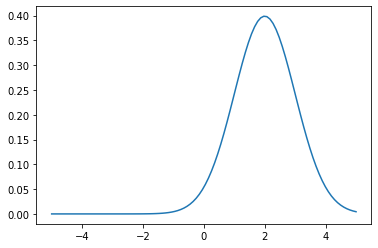

In [7]:
mu = 2
sigma = 1
min_interval=-5
max_interval=5
n_samples=100
evaluate_gaussian(mu, sigma, min_interval, max_interval, n_samples)

### Sampling from a distribution

Sampling from a random distribution consist of generating a set of values that follows that random probability distribution to a given extent.

This is of special interest because use of sampling in *particle filters*.

**Assignment**

Use the function `randn()` in the `random` module of numpy. 

This module contains functions to do sampling for a variety of random distributions. You can find additional documentation here: [Link](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

Sample a gaussian distribution with $\mu = 2$ and $\sigma = 2$. Then plot the resulting values along the x axis. 

![Example of a possible result](images/fig2-1-3.png)

In [8]:
def gen_samples(n, mu, sigma):
    """Generate n samples of a gaussian distribution
    
    Args:
        n: Number of samples
        mu: mean of the distribution
        sigma: standard deviation of the distribution

    Returns:
        array of samples
    """
    samples = sigma*np.random.randn(n)+mu # Generate samples
    
    return samples

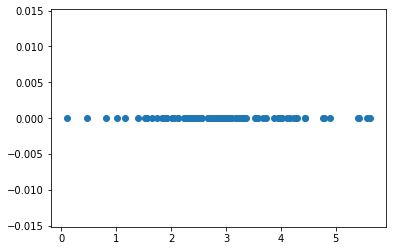

In [9]:
num = 100

plt.scatter(gen_samples(num,3,1), np.zeros(num))

Having completed the code above, you will be able to answer the following questions:
    - Which value do the samples concentrate arround? Why?

<span style="color:green">***Se concentran alrededor del valor 3, ya que es el valor de la media de la distribución.***</span>

    - Why we observe less samples the further they are from that value?

<span style="color:green">***Porque los valores se agrupan en torno a la media, y conforme se alejan de ese valor, los valores son menos frecuentes en función de sigma. A menor sigma, más cercanos al valor de la media.***</span>

Indeed, if we keep sampling the distribution and build an historam of the obtained samples, the resulting histogram will be similar to its respective gaussian given a large enough number of samples. 

**Assignment**

1. For checking this, we ask you to create a large sample vector, i.e. size 1000.

2. Then, complete the function `hist_slice`, which takes an array of samples and a integer `n`. This function plots the first `n` values of the array as a **histogram**.

3. To show the results of the exercise we will employ the use of Jupyter widgets. You can find more info about them here [[link]](https://ipywidgets.readthedocs.io/en/latest/index.html), but for the time being use the commented call to `interact`.

Play arround with different parameters of the `hist()` function from matplotlib. Docs here: [[Link]](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

The bars of the histogram should be normalized by the total area. (HINT: Set the optional `density` and `stacked` parameters of `hist()` to True)

![](images/fig2-1-4.png)

In [10]:
def hist_slice(samples, n):
    """Plot histogram for the first n values in samples"""
    
    plt.hist(samples[0:n], bins=40, edgecolor='black', density=True, stacked=True)
    X = np.linspace(-5., 8., 100)
    plt.plot(X, evaluate_gaussian(2, 2, X), 'r')
    plt.xlabel("Samples for N = %d" % (len(samples)))

ValueError: setting an array element with a sequence.

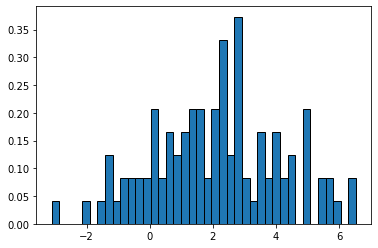

<Figure size 432x288 with 0 Axes>

In [11]:
random.seed(0)
samples = gen_samples(1000, 2, 2)
n = 100
hist_slice(samples, n)

In [ ]:
interact(hist_slice, samples=fixed(samples), n=(100, 1000, 100))

## Student discussion
In the cell below, discuss what has been done in the notebook, what you have found interesting, or any other relevant thought.

<span style="color:green">***Write your answer here***</span>